# Seccion 2 Parte 1: Pre-procesado de datos
La parte de limpieza o pre procesado es parte fundamental de cualquier metedodo de machine learning, sin poder limpiar nuestro algoritmo no seria capaz de hacer el trabajo de precicion, podriamos compararlo con preparar para un viaje cuando nos vamos de vacaciones 

---

## Obtén el conjunto de datos

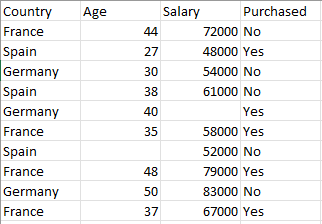

Tenemos 4 columnas que corresponden a variables las cuales tienen nombres diferentes (country, age, salary, purchased) y tenemos 10 filas las cuales corresponden 10 observaciones
en este caso tenemos datos de una empresa ya que en la cuarta columna muestra si han o no comprado un articulo

si nos fijamos las primeras 3 columnas tenemos informacion que podriamos considerar "perosnal" del cliente, de que pais procede, su edad y su salario (en bruto anual) pero la cuarta no contiene un dato personal, sino que contiene informacion acerca de como el cliente se relaciona con la empresa (compro o no el producto), que diferencia hay entre ellos, en este contexto hay que distinguir entre **variables independientes y dependientes** en ete caso lo clasificaremos de esta manera

**Variables independientes**: son las que suministramos al algoritmo de machine learnig
* Country
* Age
* Salary

**Variables dependientes**: es la que nuestro algoritmo de machine learning intentara predecir a partir de las variables independientes
* Purchased

Por lo tanto con las variables independientes buscamos predecir si hubo o no compra del producto en cuestion





## Comenzemos a codificar
empenzaremos a importar las librerias 

*  numpy: contiene herramientas matematicas que son los que nesecitamos para los algoritmos de machine learning

*  matplotlib: en esta usaremos la sublibreria **pyplot** que esta enfocada a la reprecentacion grafica
*  pandas: libreria para la carga, manejo y manipulacion de datos en python


In [20]:
import numpy as np #nombraremos la libreria nunpy como np para facilitarnos
import matplotlib.pyplot as plt 
import pandas as pd

importamos nuestro data set el cual se alamacenara en la variable `ds`

In [21]:
ds=pd.read_csv("Data.csv")

hay que recordar que los datasets empienzan con 0 de modo que la primera fila es 0

In [22]:
ds

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Ahora definiremos las variables dependientes e independientes

Variables independientes: son las que suministramos al algoritmo de machine learning

* Country
* Age
* Salary

Variables dependientes: es la que nuestro algoritmo de machine learning intentara predecir a partir de las variables independientes

* Purchased

por lo general llamamos a las variables independientes con `X` y la variable `y` representara las variables dependientes

In [23]:
X = ds.iloc[:, :-1].values
#en este caso definimos que queremos todas las columnas y queremos las filas salvo la ultima () y solo los valores
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [24]:
y = ds.iloc[:,3].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

## Limpieza / tratamiento de NaN
Los datos NaN son la usencia de valores por lo tanto se debe resolver este problema antes de suminstrar los datos a el algoritmo, hay varios enfoques que podemos realizar para solucionar ello 

Por ejemplo en nuestro dataset vemos que falta un dato en edad y salario

In [25]:
ds

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Uno de los enfoques que podriamos hacer es eleminar esas observaciones, aunque es valido puede llegar a ser peligroso porque desaparecemos informacion del cojunto original lo cual podria ser un problema, sobre todo en datos medicos como podrian ser enfermedades raras y no conocemos todas las caracteristicas de esos enfermos

Otra idea comun es remplazar los NaN's por la media de todos los valores de la columna en edad y salario en su respectivo caso

En este caso no lo haremos manueal y encargaremos a una libreria de ello llamada `sklearn` una libreria para la face de preprocesaso y aprendisaje automatizado

In [26]:
from sklearn.impute import SimpleImputer #Solo usaremos la sublibreria impute y el comando SimpleImputer


en `SimpleImputer` definimos que busque solo los valores que deben ser detectados como desconocidos y en este caso son los *NaN* mediante `np.nan` y como estrategia use la media de las columnas y lo almacene en una variable `imputer`



In [27]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(X[:,1:3]) #con fit aplicamos una funcion en este caso un objero el cual es X 
# definimos todas las filas pero unicamente las columnas que presentan problemas (edad y sueldo) para despues sobreescribir imputer
X[:,1:3]=imputer.transform(X[:,1:3])
#sobreescribiremos X solamente en las filas de edad y suledo usando el metodo transform que se encargara de devolver y sustituir los valores
X #observamos que los valores NaN ahira tendran la media de su correspondinte columna

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Datos categoricos
Se refiere como datos categoricos a una columna que en vez de datos numericos contiene un valor para clasificar o catogar a los usuarios
Esto representan una serie de categorias, etiquetas que damos a los usuarios
cuando uno intenta poner en un modelo en dato categorico no podra reconocer por lo tanto debemos limpiar esos datos

Para ello usaremos la libreria `sklearn` usando `preprocessing.LabelEncoder()`

In [28]:
from sklearn import preprocessing

tomamos las variables de la matriz de caracteristicas (los paises)

In [29]:
le_X = preprocessing.LabelEncoder()
X[:,0] = le_X.fit_transform(X[:,0]) 
#fit_transform se encargara de tomar directamente las columnas que indiquemos que son categorias y las transforme a datos numericos 
#en este caso usaremos la primera columna llamado paises
#para depsues sobreescribir en X solo en la columna paises (0)
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

ya "traducido" esto nos generara otro problema y es que cuando lo pongamos en un modelo pensara en la columna de paises que el 0 es menor que 1 y que 1 es menor que 2 por lo tanto se volvio una variable ordinal (categoria que tiene cierto orden), asi que para categorias no ordinales no es completamente correcta por lo tanto lo volveremos variable dummy

una variable dummy o llamadas one hot encoder es una manera de traducir una categoria que no tiene orden a un conjunto de tantas columnas como categorias existen por lo tanto crearemos una variable dummy con las columans freancia españa y alemanaia 

\begin{array}{|c|c|} \hline
Francia & España & Alemania\\ \hline
0 & 1 & 0\\
1 & 0 & 0\\
0 & 0 & 1\\ \hline
\end{array}

se llama one hot encoder/vector porque para cada una de las observaciones en las 3 variables dummy que generamos solo puede haber un numero uno correspondiendo a que categoria corresponde el dato

Para ello usaremos `from sklearn.preprocessing import OneHotEncoder` que nos ayudara con las variables dummy

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
 
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   
    remainder='passthrough'                        
)
X = np.array(ct.fit_transform(X), dtype=np.float)

C:\Users\Jistro\AppData\Local\Temp/ipykernel_26968/2634110102.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(ct.fit_transform(X), dtype=np.float)


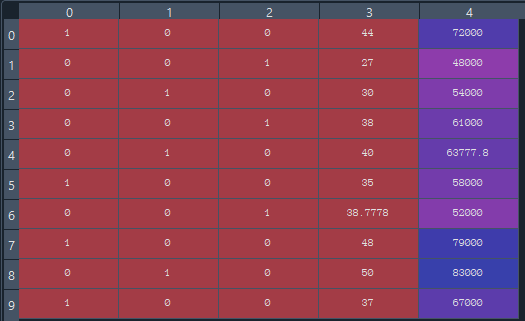

tomamos el vector de variables a predecir (compra)

In [31]:
le_y = preprocessing.LabelEncoder()
y = le_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Cómo dividir el data set en entrenamiento y test
Yendo un poco atras recordamos que teniamos una serie de datos observados y la idea es suministralo a un algoritmo que una maquina va a ejecutar para intentar aprender rasgos a partir de las variables independientes de las categorias y de los datos numericos que definen las observaciones de nuestros usuarios para intentar predecir una variable dependiente en este caso si, si o no ha comprado el producto en cuestion el problema es que si solamente creamos el modelo del algoritmo y no lo probamos en ningun momento no vamos a saber si funciona o no con los datos que no sean de este dataset

el aprenderce de memoria los datos por párte de un algoritmo se conoce como el termino de **Overfitting**
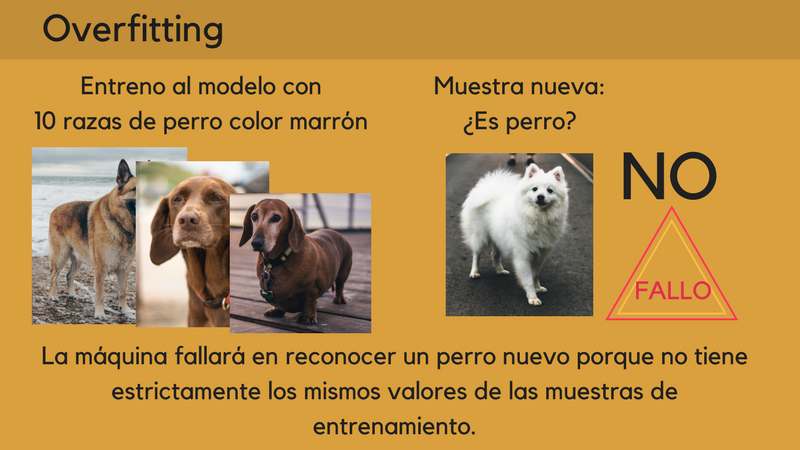

la idea es dividir la informacion aprox. un 70-80% del conjunto de datos que tenemos se utilizara para crear un modelo lo que llamaremos la fase de entrenamiento mientras que el 20-30% restante sera usado para evaluar el cual llamaremos la fase de testing

Para ello y facilitarnos la programacion usaremos la libreria `from sklearn.model_selection import train_test_split` la cual automaticamente dandole la matriz de caracteristicas `X` y el vector de datos a predecir `y` va a segmentar automaticamente ambos en un conjunto de entrenamiento y testing de modo que en lugar de tener dos variables, tendremos 4
la `X_train` de entrenamiento, la `X_test` de testing la `y_train` de entrenamineto, que tiene el valor que va a usarse en el algoritmo como prediccion y la `y_test` de test que es la que haremos que el algoritmo 

suministramos la matriz de datos X para que divida el test y train y a continuacion se le suministra el vector a predecir y

se indica el `test_size` que indica el tamaño del conjunto de testing, esto se indica en porcentaje es decir que el 100% de los datos en esta ocasion usaremos el 20% para testing de modo que el 80% se usara de modo de entrenamiento 
y lop ultimo que agregaremos es `random_state` que se trata del numero para poder reproducir el algoritmo, como esta division sera aleatoria cada vez que ejecutemos dara siempre un valor diferente y para que no ocurra eso y devuelva siempre el mismo resultado es colocar una semilla aleatoria, un numero que si se coloca en el mismo algoritmo se dara el mismo resultado en cualquier maquina 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) 


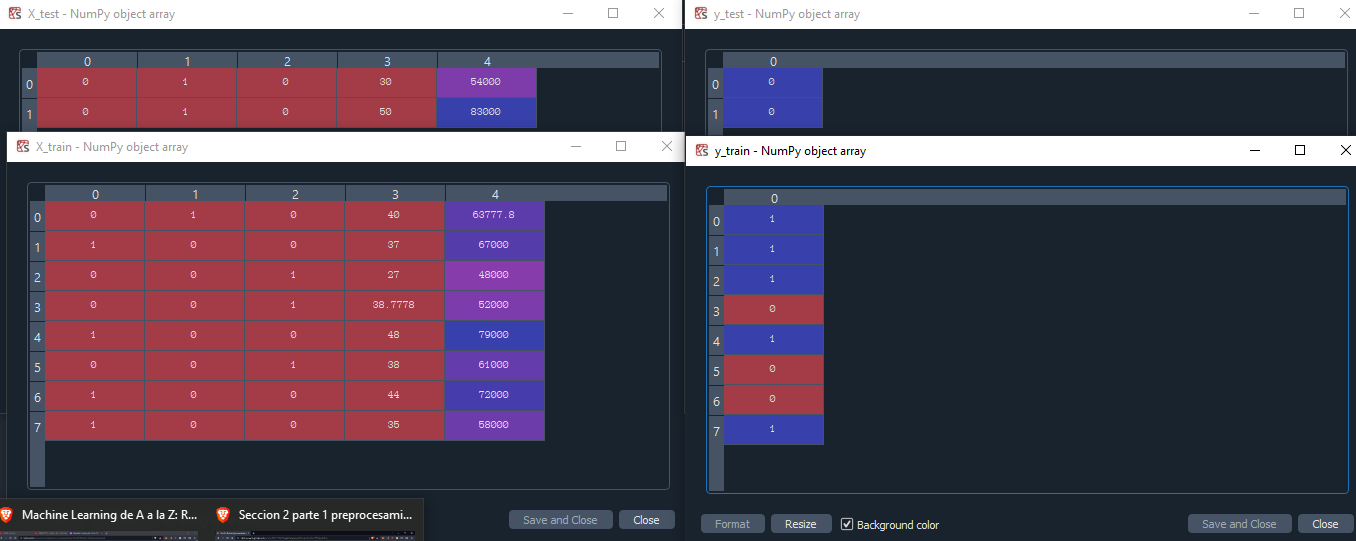

si nos damos cuenta del conjunto original de datos que eran 10 filas, despues de hacer esa division entre entrenamiento y testing, nos fijamos que los conjuntos de entrenamiento `X_train` y `y_train` se han llevado el 80% de los datos y tenemos reservado el 20% para testing de modo que cuando suministramos al algoritmo solamente el conjunto `X_test`, lo que va a tener que evaluar si es capas de predecir un 0 para el primer individuo de test y otro 0 para el individuo numero 2 del conjunto `X_test`

En base a esas relaciones creadas luego evaluaremos, si solo dandole el `X_test` es capas de dar un 0 o el segundo elemento de `X_test` es capas de darnos 0, la diferencia sera que si el algoritmo lo ha hecho bien y a aprendidio a groso modo como se comporta los datos para nuestro modelo sera capas de hacer las predicciones a pesar de que estas observaciones nunca los ha conocido el modelo de machine learning para entrenar, si mi modelo realmente se ha aprendido de memoria los 8 elementos de `X_train` (Overfitting/sobreajuste), entonces cuando se haga un testing entonces no va comportarce bien y cometer errores

## Cómo escalar los datos
Para poder entender este termino y su nesecidad iremos a ver el conjunto de datos que conocemos junto con una grafica 
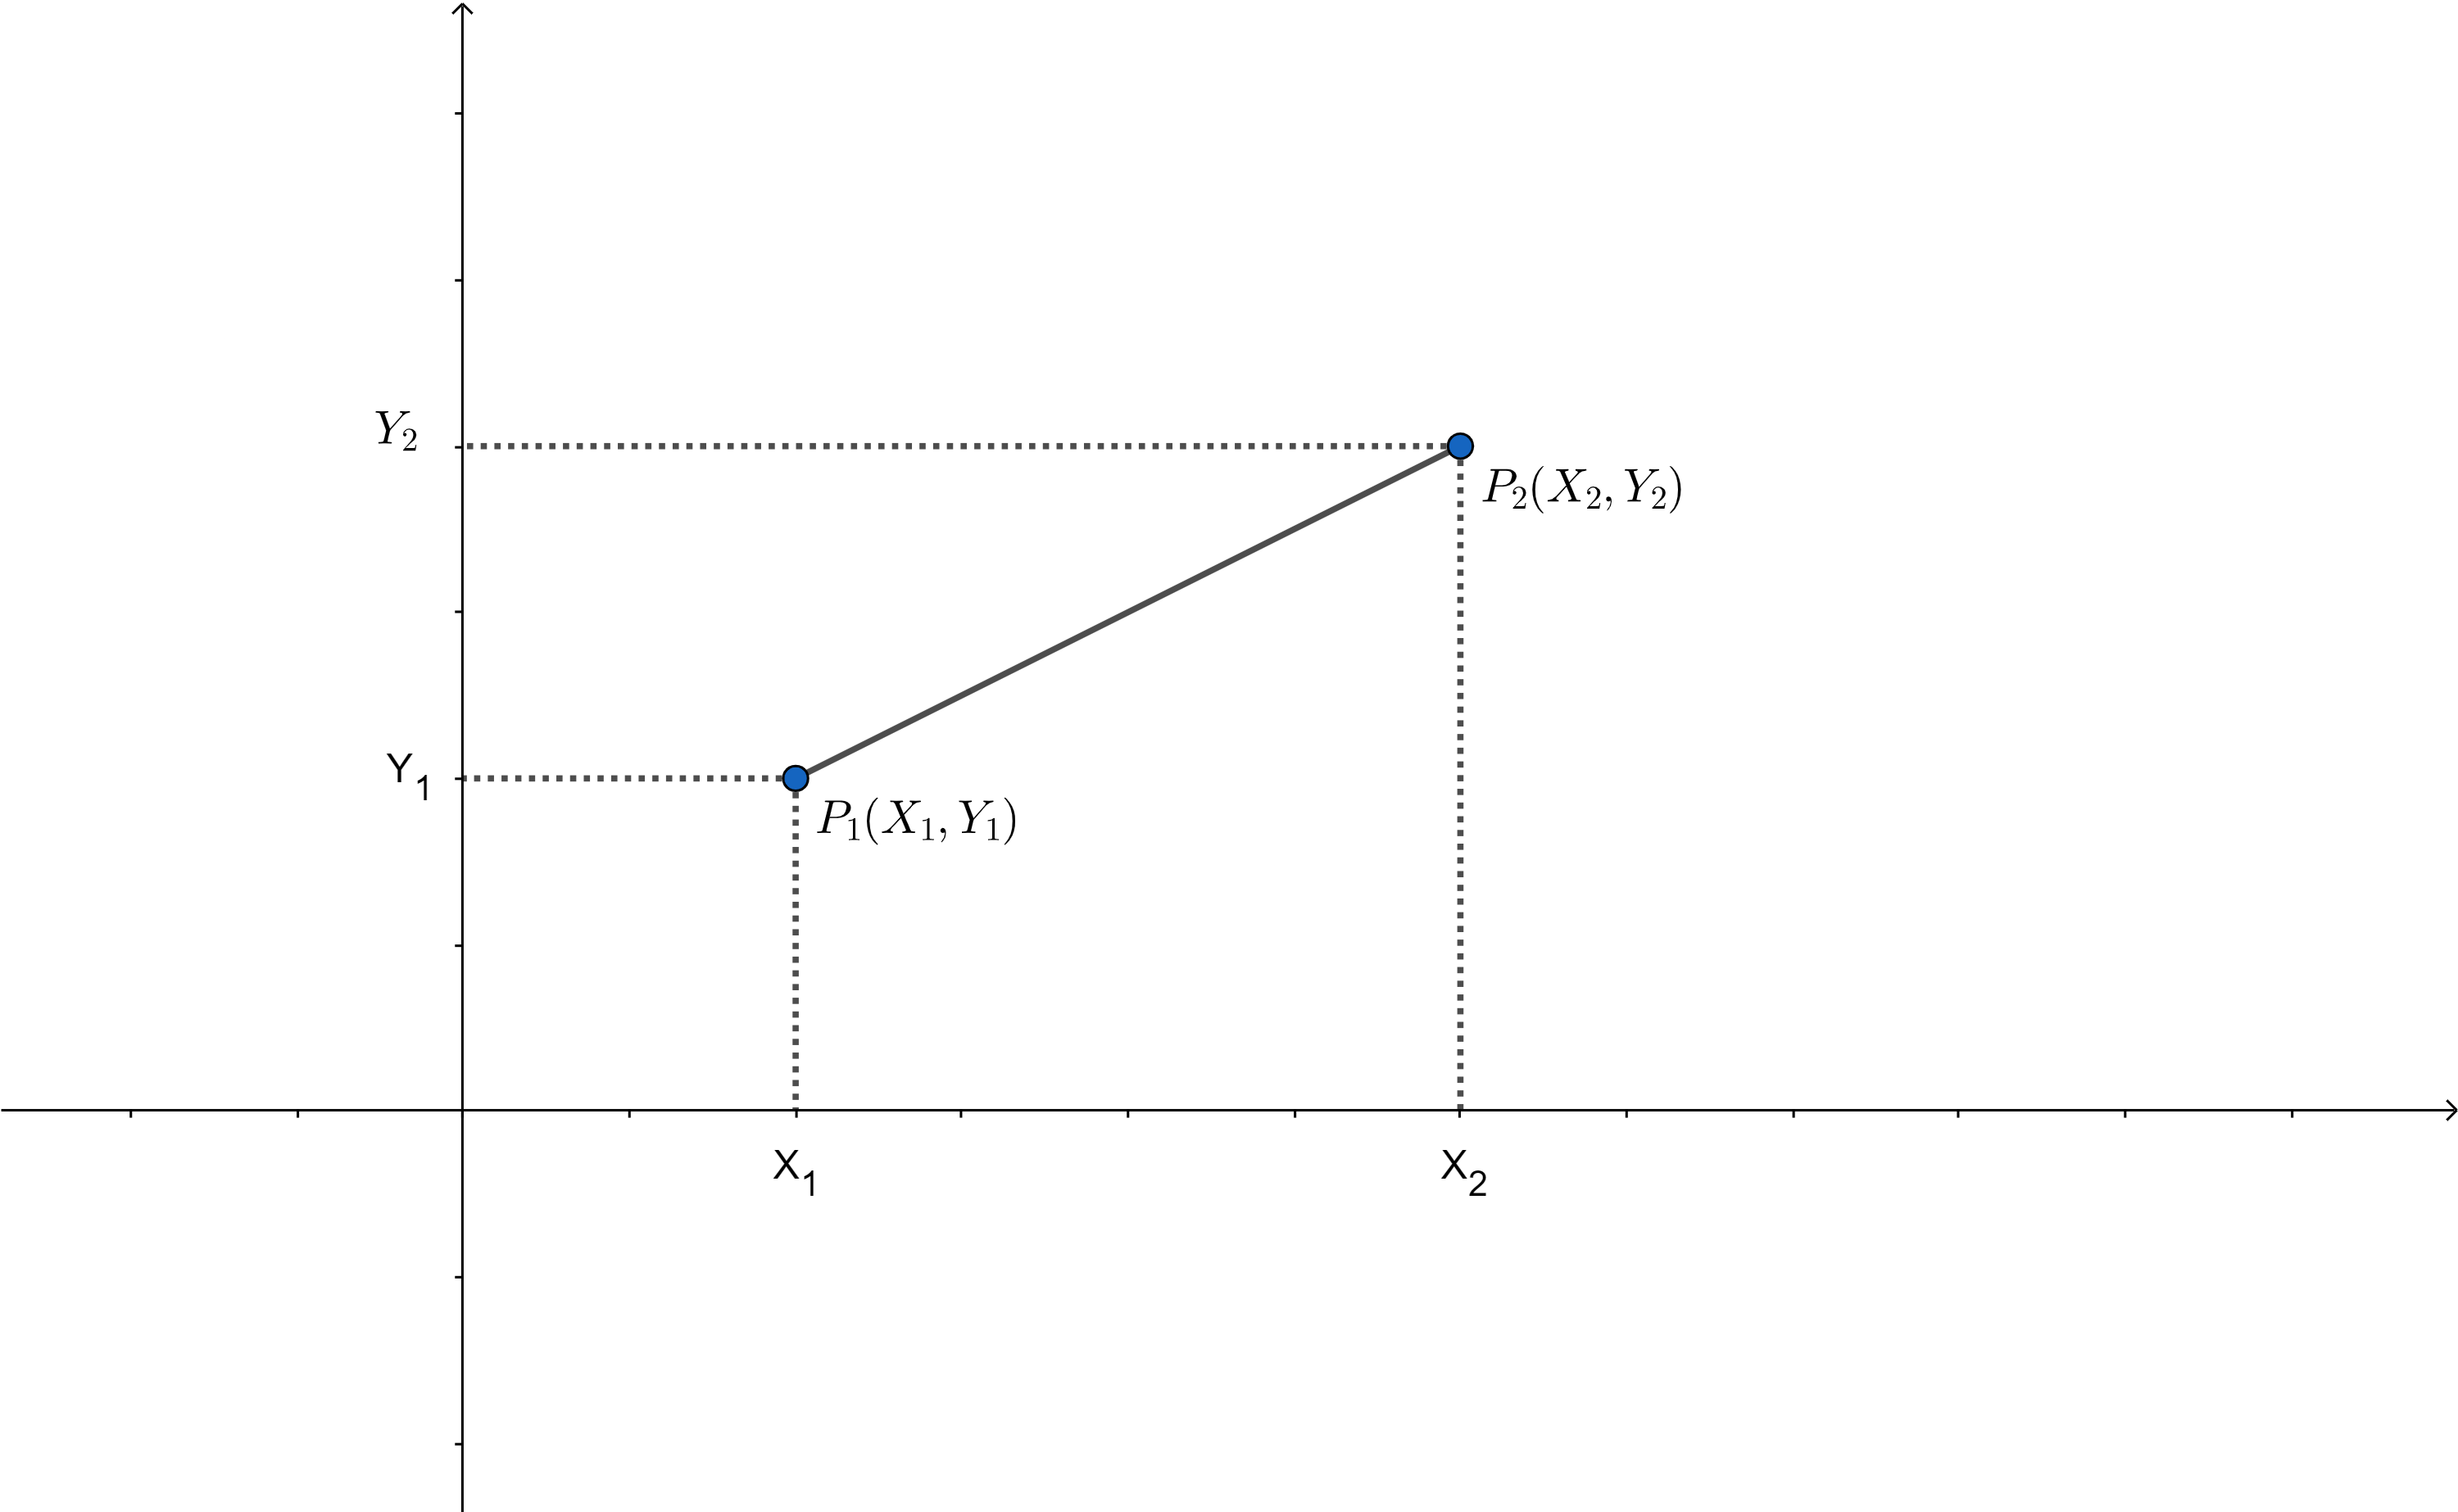



In [33]:
ds

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Ya habiamos visto que hay un serie de variables que eran categorias y hemos trabajado con las variables numericas en particular inferencias o rellenar los datos NaN's con la media lo que preocupa en este caso es el dato numerico, el cual es importante porque en el machine learning se puede operar con ellos, se pueden hacer operaciones, el problema esta en que los algoritmos tienden querer comparar los elementos por ejemplo el individuo 3, el español de 27 años con 48000 de sueldo anual con el aleman de 50 años con sueldo anual de 83000 al principio no hay problema las edades son comparables, el suldo es comparable y para saber si un una observacion esta cerca uno del otro es usando la distancia euclidia definiendo la distancia enttre los dos con la formula 

$P_{2}=\sqrt{(x_{2}-x_{1})+(y_{2}-y_{1})}$ 

de modo que x representa la edad e y el sueldo ocurre que la columna de edad y sueldo no se encuentran dentro del mismo rango de valores de modo que cuando aplicamos la formula de una diferencia de numeros pequeños resultara en un numero mas pequeño que cuando hacemos diferencia entre numeros mas grandes, en nuestro caso haciendo el calculo basandonos en nuestra tabla no importando que observacion el resultado de distancia es apenas inperceptible haciendo que la diferencia de edad pasara inadvertido y el sueldo sera abismal en comparacion a la diferencia de edad

Si hay una variable cuyo rango de valores es muy superior a las otras podria ser un problema porque las variables con menor rango pasaran inadvertidas en el caso de comparrar con distancias euclidias

La solucion seria escalar datos que significa la normalizacion de estos datos para que ambos esten definidos en el mismo rango de valores

Un ejemplo seria escalar entre -1 y 1 de modo que en este caso la edad mas pequeña corresponda al valor -1 y la mayor a 1 

Esa normalizacion o estandarizacion sera de suma importancia para evitar que unas variables dominen sobre otras dentro de nuestro algoritmo y que el propio algoritmo sea en que deba dicernir entre que paso dar a cada una de las variables no por tener un rango menor o mayor, si no porque realmente aportan mas o menos en el proceso de prediccion o clasificacion de nuestros datos

y en este sentido existen dos conceptos que se tiene que diferenciar, por un lado la estandarizacion y por otra la normalizacion



La estandarizacion es una operacion que dado cualquier numero x le resta la media de toda la columna de datos y lo divide por la desviacion tipica de la misma columna, esta operacion tiende a generar una campana de gauss en el sentido de que muchos valores estaran cercanos a 0 y cada vez que nos alejemos mas del 0 ya sea izquierda o derecha, tenderemos a tener menos valores, esto permite aglutinar valores en torno a la media, de modo de que todo lo que es cercano al valor medio de la columna es mapaeado transformado al numero cero

$z_{i}=\frac{x-media(x))}{desviacion~tipica(x)}=\frac{x_{i}-\overline{X}}{S_{X}}$

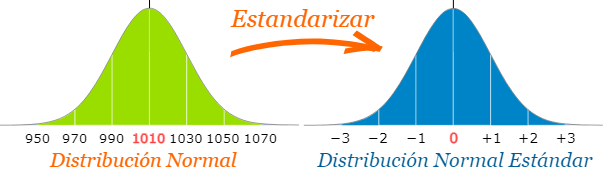


Por contra el porceso de normalizacion que es tomar cada uno de los numeros y restar el minimo y dividir por el rango (el maximo menos el minimo) de la columna transforma la columna de datos en el conjunto 0, 1 de modo que el numero mas pequeño se transforma en el 0 y el numero mas grande se transforma en 1 y el resto es escalado de manera lineal 

$z_{norm}=\frac{x-minimo(x))}{maximo(x)- minimo(x)}$



para ello usaremos la libreria `from sklearn.preprocessing import StandartScaler` que se usa igual que `label_encoder` simplemente hay que hacer un escalador y usarlo primero para hacer un `fit_transform` para saber entre que valores debe escalar automaticamente y luego usarlo para hacer el cambio propiamente dicho

In [34]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

#creamos nuestro escalador en X y escalamos automaticamente el conjunto de entrenamiento 
X_train = sc_X.fit_transform(X_train)

Nos fijamos que usamos el `fit_transform` con el conjunto de entrenamiento para escalar automaticamente, no sera asi con el conjunto de test, el conjunto de test se va a escalar con la misma transformacion que el escalador haya detectado a partir del conjunto de entrenamiento, lohacemos asi porque si no hariamos un escalado diferente para entrenar y otro para testing y se trata de que todo quede escalado con la misma formula 

para train invocaremos solamente el `transform` para que escale los datos de test con la misma transformacion quje tiene que hacer a partir de los datos de entrenamiento 

In [35]:
X_test = sc_X.transform(X_test)

hay que tener en cuenta algo y es que cuando tomamos los datos y tenemos variables dummy debemos hacernos la pregunta si escalarlos o no, y hay razon para ambas, la razon evidente es para que quede escaladas igual que el resto de variables y que se comporten del mismo modo y mas por cuerencia, porque si escalamos las variables dummy quedaran entre el mismo rango de valores que estan las variables transformadas y no hay que escalarlas porque al escalar perderemos la nosion importante la cual es la pertenencia o no a la clase dummy que representa al nivel de categoria, por lo tanto ambas respuestas son correctas y tendremos que valorar nosotros mismos que ayude a tal efecto, hay que destacar que el algoritmo jamas sera mas optimo o rapido si escalamos valores dummy

In [36]:
X_train

array([[-1.        ,  2.64575131, -0.77459667,  0.26306757,  0.12381479],
       [ 1.        , -0.37796447, -0.77459667, -0.25350148,  0.46175632],
       [-1.        , -0.37796447,  1.29099445, -1.97539832, -1.53093341],
       [-1.        , -0.37796447,  1.29099445,  0.05261351, -1.11141978],
       [ 1.        , -0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
       [-1.        , -0.37796447,  1.29099445, -0.0813118 , -0.16751412],
       [ 1.        , -0.37796447, -0.77459667,  0.95182631,  0.98614835],
       [ 1.        , -0.37796447, -0.77459667, -0.59788085, -0.48214934]])

ahora X_train esta escalado de modo que todas las variables valen entre -1 y 1, algunas se salen ya que se hizo una **estandarizacion** asi que es normal encontrar valores superiores a 1 o inferiores a -1, pero todos los valores estan aglutinados en torno al centro

hay que recordar que los algoritmos de clasificacion no nesecitan escalar y_train e y_test lo que queremos es clasificar si compra o no, sin embargo en algoritmos de prediccion si hay nesecidad de normalizar el vector de datos a predecir para guardar una concistencia del mismo modo que se hizo con las de partida 